# Cost Function

In [1]:
#Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

## Creating Sample Dataset

In [2]:
#Creating a sample dataset
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary     = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

df = pd.DataFrame({
    'Experience' : experience,
    'Salary' : salary
})
df.head()

,Experience,Salary
0,1.2,1.7
1,1.5,2.4
2,1.9,2.3
3,2.2,3.1
4,2.4,3.7


## Plotting the data

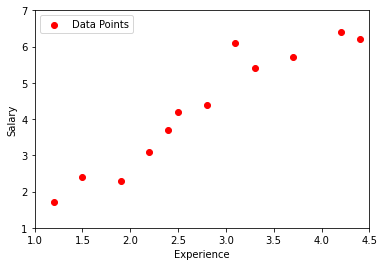

In [3]:
plt.scatter(df.Experience, df.Salary, color='red', label='Data Points')
plt.xlim(1, 4.5)
plt.ylim(1, 7)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()

## Starting the Line using small values of parameters

Text(0.5, 1.0, 'Beta value : 0.1 with MSE : 10.81115')

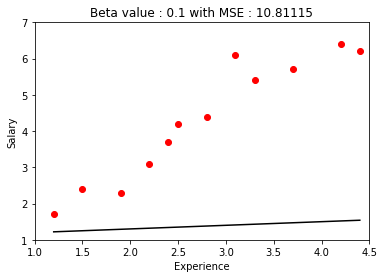

In [4]:
#Draw line by choosing beta=0.1
beta=0.1   #Slope
#Keeping intercept constant
b = 1.1    #Intercept
#Create a empty list to store a predicted points
line = []

#Generating predictions for every data points
for i in range(len(df)):
    line.append(df.Experience[i]*beta + b)    #x*slope + intercept
    
#Plotting the line
plt.scatter(df.Experience, df.Salary, color='red')
plt.plot(df.Experience, line, color='black', label='line')
plt.xlim(1, 4.5)
plt.ylim(1, 7)
plt.xlabel('Experience')
plt.ylabel('Salary')
#plt.legend()
MSE = mse(df.Salary, line)
plt.title('Beta value : '+str(beta)+" with MSE : "+str(MSE))

Text(0.5, 1.0, 'Beta value : 1.2 with MSE : 0.3752666666666666')

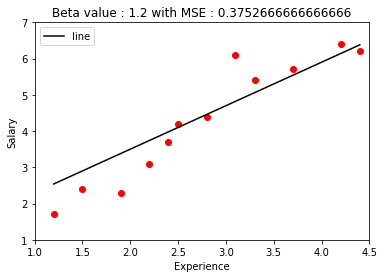

In [5]:
#Draw line by choosing beta=1.2
beta=1.2  #Slope
#Keeping intercept constant
b = 1.1    #Intercept
#Create a empty list to store a predicted points
line = []

#Generating predictions for every data points
for i in range(len(df)):
    line.append(df.Experience[i]*beta + b)    #x*slope + intercept
    
#Plotting the line
plt.scatter(df.Experience, df.Salary, color='red')
plt.plot(df.Experience, line, color='black', label='line')
plt.xlim(1, 4.5)
plt.ylim(1, 7)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
MSE = mse(df.Salary, line)
plt.title('Beta value : '+str(beta)+" with MSE : "+str(MSE))

<img src="Multiple_plots.png">

## Computing Cost over a range of values of Beta

In [6]:
#Create a function to calculate a error
def error(beta, data):
    b = 1.1 #b(intercept) is constant
    
    salary = []  #List to store predicted salary values
    experience = data.Experience
    
    #Run a loop to predict salary values for each row
    for i in range(len(data.Experience)):
        salary_temp = data.Experience[i]*beta + b
        salary.append(salary_temp)
    MSE = mse(salary, data.Salary)
    return MSE

In [7]:
#Range of slopes from 0 to 1.5 with increment of 0.01
slope = [i/100 for i in range(0, 150)]
cost = []
for i in slope:
    cost_temp = error(beta=i, data=df)
    cost.append(cost_temp)

In [8]:
#Arranging beta values and cost into a dataframe
Cost_table = pd.DataFrame({
    'Beta' : slope,
    'Cost' : cost
})
Cost_table.head(10)

,Beta,Cost
0,0.00,12.791667
1,0.01,12.585876
2,0.02,12.381806
3,0.03,12.179455
4,0.04,11.978824
5,0.05,11.779913
6,0.06,11.582721
7,0.07,11.387249
8,0.08,11.193496
9,0.09,11.001463


## Visualising cost with respect to Beta

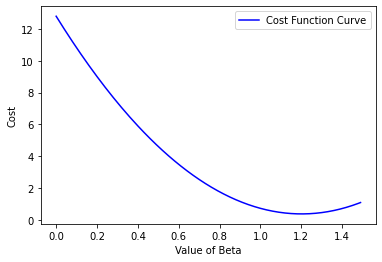

In [9]:
#Plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.Beta, Cost_table.Cost, color='blue', label='Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()

<img src="3d_convex.jpg">

## But what if we are given...
# $Y = ß_1X_1 + ß_2X_2 + ß_3X_3 ... + ß_nX_n + b$
